## 모델 학습

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mnt/')

Mounted at /content/mnt/


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train = pd.read_csv('/content/mnt/MyDrive/Project/data/train_preprocessing.csv')
test = pd.read_csv('/content/mnt/MyDrive/Project/data/test_preprocessing.csv')

In [3]:
train = pd.read_csv('./train_preprocessing.csv', encoding = 'utf-8')
test = pd.read_csv('./test_preprocessing.csv', encoding = 'utf-8')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26088 entries, 0 to 26087
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              26088 non-null  int64  
 1   car                 26088 non-null  int64  
 2   reality             26088 non-null  int64  
 3   child_num           26088 non-null  int64  
 4   income_total        26088 non-null  float64
 5   income_type         26088 non-null  int64  
 6   edu_type            26088 non-null  int64  
 7   family_type         26088 non-null  int64  
 8   house_type          26088 non-null  int64  
 9   DAYS_BIRTH          26088 non-null  int64  
 10  DAYS_EMPLOYED       26088 non-null  int64  
 11  family_size         26088 non-null  float64
 12  begin_month         26088 non-null  float64
 13  credit              26088 non-null  float64
 14  before_EMPLOYED     26088 non-null  int64  
 15  before_EMPLOYED_ct  26088 non-null  int64  
 16  Age 

In [5]:
train.std()

gender                    0.470387
car                       0.484914
reality                   0.469144
child_num                 0.646875
income_total              0.480361
income_type               1.736034
edu_type                  1.342818
family_type               0.876207
house_type                0.945997
DAYS_BIRTH             4214.144872
DAYS_EMPLOYED          2376.389786
family_size               0.832739
begin_month              16.557938
credit                    0.702609
before_EMPLOYED        4878.256800
before_EMPLOYED_ct        2.629000
Age                      11.548545
DAYS_BIRTH_ct             2.658179
EMPLOYED                  6.442884
DAYS_EMPLOYED_ct          1.444662
ability                   6.770441
income_mean           73239.270648
ID                     2163.107624
dtype: float64

In [6]:
train['credit'].unique()

array([1., 2., 0.])

In [7]:
train['credit'] = train['credit'].apply(lambda x: int(x))
# train['credit'] = train['credit'].apply(lambda x: float(1) if x == float(0) else x)
# train['credit'].unique()

In [8]:
from sklearn.preprocessing import StandardScaler
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
numerical_feats.remove('income_total') # 이미 로그변환을 진행한 income_total을 제외한 나머지 numeric 컬럼 정규화
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

- 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split
X = train.drop('credit', axis=1)
y = train.credit
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2021)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18261, 22), (7827, 22), (18261,), (7827,))

### 로지스틱 회귀

In [24]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression(random_state=42)
model_logit.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
model_logit.score(X_train, y_train), model_logit.score(X_test, y_test) 

(0.6419692240293522, 0.6422639580937779)

In [26]:
# 예측
y_pred = model_logit.predict(X_test)

[[   0    1  954]
 [   0    7 1844]
 [   0    1 5020]]


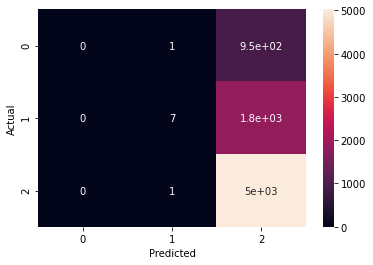

In [27]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
# 모형 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       955
           1       0.78      0.00      0.01      1851
           2       0.64      1.00      0.78      5021

    accuracy                           0.64      7827
   macro avg       0.47      0.33      0.26      7827
weighted avg       0.60      0.64      0.50      7827



### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, {'n_neighbors': [5, 10, 30, 100]}, n_jobs=4, cv=3, scoring='accuracy')

In [68]:
model_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [5, 10, 30, 100]}, scoring='accuracy')

In [69]:
model_knn.best_params_

{'n_neighbors': 30}

In [70]:
knn_best = model_knn.best_estimator_

In [71]:
y_pred = knn_best.predict(X_test)

[[   7   46  902]
 [   6  145 1700]
 [  16  146 4859]]


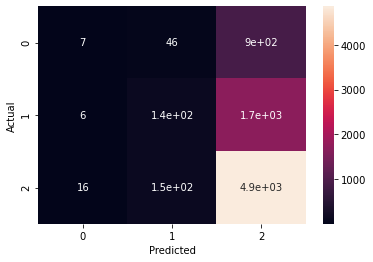

In [72]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.01      0.01       955
           1       0.43      0.08      0.13      1851
           2       0.65      0.97      0.78      5021

    accuracy                           0.64      7827
   macro avg       0.44      0.35      0.31      7827
weighted avg       0.55      0.64      0.53      7827



### SVM

In [74]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf', random_state=42)

In [75]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, 
                           {'C': [1, 5, 9, 15], 'gamma':[0.01, 0.05, 0.1]}, 
                           n_jobs=-1, cv=7, scoring='accuracy')

In [76]:
start = time.time()
model_svm.fit(X_train, y_train)
print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

GridSearchCV(cv=7, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 5, 9, 15], 'gamma': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [81]:
model_svm.best_params_

{'C': 9, 'gamma': 0.05}

In [77]:
svm_best = model_svm.best_estimator_

In [78]:
y_pred = svm_best.predict(X_test)

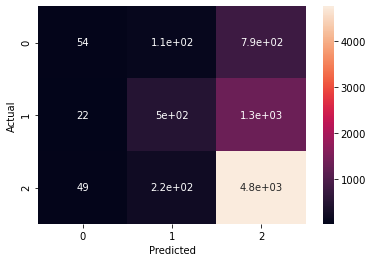

In [79]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10       955
           1       0.60      0.27      0.37      1851
           2       0.69      0.95      0.80      5021

    accuracy                           0.68      7827
   macro avg       0.58      0.42      0.42      7827
weighted avg       0.64      0.68      0.61      7827



### 결정트리

In [137]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
print(dt.feature_importances_)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[0.00954251 0.00660736 0.00590397 0.         0.01506942 0.00261458
 0.00899157 0.0030566  0.00619    0.04438264 0.06706586 0.00571455
 0.59201632 0.04434912 0.0040245  0.00585568 0.01428179 0.01276572
 0.00544315 0.05628843 0.03039407 0.05944216]
0.111초


In [138]:
# 예측
y_pred = dt.predict(X_test)

[[  26  115  814]
 [  51  451 1349]
 [  19   96 4906]]


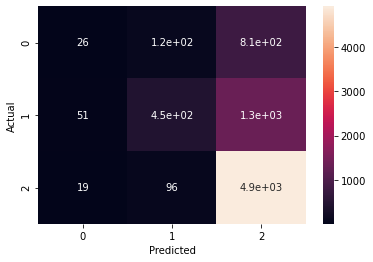

In [139]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.03      0.05       955
           1       0.68      0.24      0.36      1851
           2       0.69      0.98      0.81      5021

    accuracy                           0.69      7827
   macro avg       0.55      0.42      0.41      7827
weighted avg       0.64      0.69      0.61      7827



In [90]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

start = time.time()

plt.figure(figsize=(30,20))
plot_tree(dt, filled=True)

plt.show()

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

0.0초


In [108]:
#print(dt.feature_importances_)
dt.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(max_depth=10, random_state=42)>

In [125]:
# feature 별 feature importance 매핑
feature_names = X.columns.tolist()
feature_value = dt.feature_importances_
dict_feature = {n:v for n, v in zip(feature_names, feature_value)}
dict_feature = sorted(dict_feature.items(), reverse=True, key=lambda x: x[1])

In [128]:
tmp_value = []
tmp_name = []
for i in dict_feature:
    tmp_name.append(i[0])
    tmp_value.append(i[1])
# print(tmp_name, tmp_value)

['begin_month', 'DAYS_EMPLOYED', 'ID', 'ability', 'DAYS_BIRTH', 'before_EMPLOYED', 'income_mean', 'income_total', 'DAYS_BIRTH_ct', 'EMPLOYED', 'gender', 'edu_type', 'car', 'house_type', 'reality', 'Age', 'family_size', 'DAYS_EMPLOYED_ct', 'before_EMPLOYED_ct', 'family_type', 'income_type', 'child_num'] [0.5920163190521134, 0.0670658596470715, 0.059442160018513795, 0.05628843309193677, 0.044382638190586715, 0.04434912004890066, 0.030394065595370497, 0.015069419039178687, 0.0142817929114624, 0.012765715517489166, 0.009542513294931346, 0.008991566448305214, 0.006607358957170586, 0.006189998586934981, 0.005903974708301012, 0.005855680857244654, 0.0057145540705923455, 0.005443145384664442, 0.004024497500719282, 0.0030566029257512984, 0.002614584152761225, 0.0]


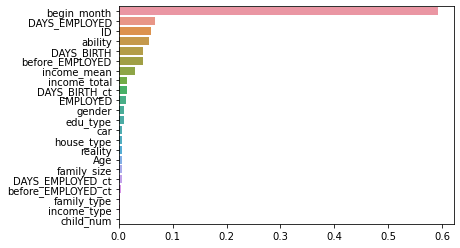

In [130]:
# feature importance 시각화
sns.barplot(x=tmp_value, y=tmp_name)
plt.savefig('./img/dt_feature_importance.png', dpi = 150)
plt.show()

### 랜덤 포레스트

In [44]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간

# 랜덤 포레스트의 parameter 범위 정의
RF_params = {
    'n_estimators' : [1000],
    'max_features' : ['auto'],
    'max_depth' : [15],
    'min_samples_leaf' : [5],
    'min_samples_split' : [2, 4]   # min_samples_split 1보다 크거나 또는 (0, 1.0]
}

# GridSearchCV를 이용
model_RF = GridSearchCV(RandomForestClassifier(random_state=42,), param_grid=RF_params, n_jobs=8)
model_RF.fit(X_train, y_train)
print(model_RF.best_params_)

RF_best = model_RF.best_estimator_

y_pred = RF_best.predict(X_test)

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}
걸린시간 : 49.483초


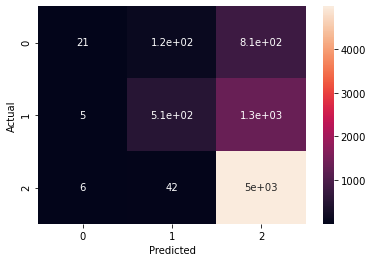

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.02      0.04       955
           1       0.76      0.28      0.41      1851
           2       0.70      0.99      0.82      5021

    accuracy                           0.70      7827
   macro avg       0.70      0.43      0.42      7827
weighted avg       0.71      0.70      0.63      7827



### XGBoost

In [30]:
from xgboost import XGBClassifier

In [47]:
start = time.time()

XGB_params = {
    'min_child_weight': [3, 5],
    'gamma': [1],
    'subsample': [1],
    'colsample_bytree': [0.6],
    'max_depth': [10]}

model_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid=XGB_params, n_jobs=8)

model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)

xgb_best = model_xgb.best_estimator_
y_pred = xgb_best.predict(X_test)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[10:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 1}
7.714초


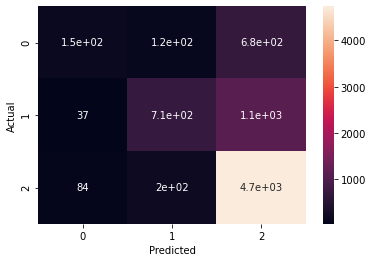

In [48]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.16      0.24       955
           1       0.69      0.38      0.49      1851
           2       0.73      0.94      0.82      5021

    accuracy                           0.72      7827
   macro avg       0.66      0.50      0.52      7827
weighted avg       0.70      0.72      0.67      7827



## 변수축소 - 모델학습 및 평가

In [51]:
# 변수축소
X_train = X_train[['begin_month', 'DAYS_EMPLOYED', 'ID', 'ability', 'DAYS_BIRTH', 'before_EMPLOYED', 'income_mean']]
X_test = X_test[['begin_month', 'DAYS_EMPLOYED', 'ID', 'ability', 'DAYS_BIRTH', 'before_EMPLOYED', 'income_mean']]

### 로지스틱 회귀

In [52]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

LogisticRegression()

In [53]:
model_logit.score(X_train, y_train), model_logit.score(X_test, y_test) 

(0.641476370406878, 0.6414973808611217)

In [54]:
# 예측
y_pred = model_logit.predict(X_test)

[[   0    0  955]
 [   0    0 1851]
 [   0    0 5021]]


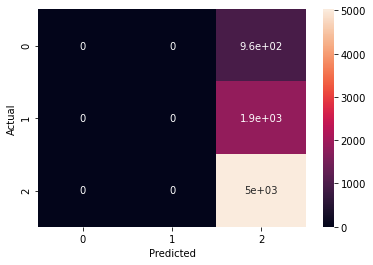

In [55]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
# 모형 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       955
           1       0.00      0.00      0.00      1851
           2       0.64      1.00      0.78      5021

    accuracy                           0.64      7827
   macro avg       0.21      0.33      0.26      7827
weighted avg       0.41      0.64      0.50      7827



### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, {'n_neighbors': [10,30]}, n_jobs=-1, cv=7, scoring='accuracy')

In [59]:
model_knn.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 30]}, scoring='accuracy')

In [60]:
model_knn.best_params_

{'n_neighbors': 30}

In [61]:
knn_best = model_knn.best_estimator_

In [62]:
y_pred = knn_best.predict(X_test)

[[   5   97  853]
 [   7  305 1539]
 [  10  110 4901]]


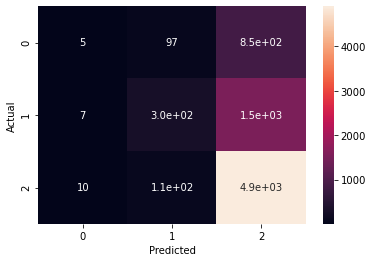

In [63]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.01      0.01       955
           1       0.60      0.16      0.26      1851
           2       0.67      0.98      0.80      5021

    accuracy                           0.67      7827
   macro avg       0.50      0.38      0.35      7827
weighted avg       0.60      0.67      0.57      7827



### SVM

In [65]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')

In [66]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, 
                           {'C': [1, 9, 15], 'gamma':[0.05]}, 
                           n_jobs=-1, cv=7, scoring='accuracy')

In [67]:
model_svm.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 9, 15], 'gamma': [0.05]}, scoring='accuracy')

In [68]:
model_svm.best_params_

{'C': 15, 'gamma': 0.05}

In [69]:
svm_best = model_svm.best_estimator_

In [70]:
y_pred = svm_best.predict(X_test)

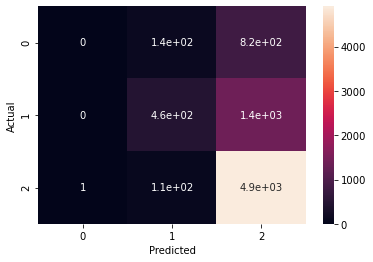

In [71]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       955
           1       0.65      0.25      0.36      1851
           2       0.69      0.98      0.81      5021

    accuracy                           0.69      7827
   macro avg       0.45      0.41      0.39      7827
weighted avg       0.60      0.69      0.60      7827



### 결정트리

In [73]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [74]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=10, random_state=42) 
dt.fit(X_train, y_train)
print(dt.feature_importances_)

[0.61695779 0.06787029 0.06703282 0.0872128  0.06302769 0.06233207
 0.03556654]


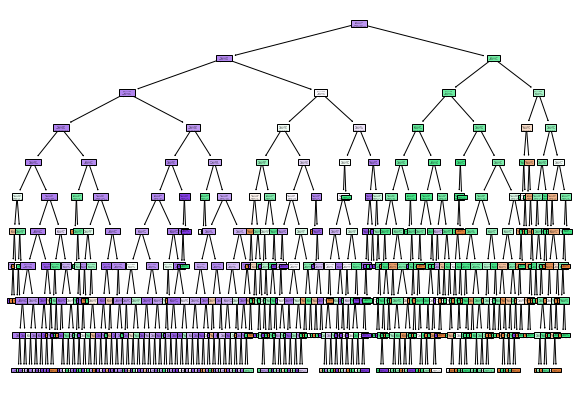

In [75]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True)
plt.show()

In [76]:
print(dt.feature_importances_)

[0.61695779 0.06787029 0.06703282 0.0872128  0.06302769 0.06233207
 0.03556654]


In [84]:
# feature 별 feature importance 매핑
feature_names = X_train.columns.tolist()
feature_value = dt.feature_importances_
dict_feature = {n:v for n, v in zip(feature_names, feature_value)}
dict_feature = sorted(dict_feature.items(), reverse=True, key=lambda x: x[1])


tmp_value = []
tmp_name = []
for i in dict_feature:
    tmp_name.append(i[0])
    tmp_value.append(i[1])
# print(tmp_name, tmp_value)

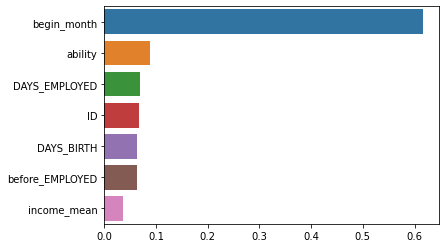

In [85]:
# feature importance 시각화
sns.barplot(x=tmp_value, y=tmp_name)
plt.show()

In [86]:
y_pred = dt.predict(X_test)

[[  29  116  810]
 [  54  422 1375]
 [  31   76 4914]]


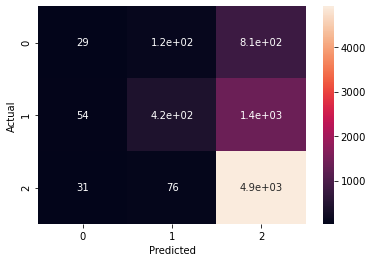

In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05       955
           1       0.69      0.23      0.34      1851
           2       0.69      0.98      0.81      5021

    accuracy                           0.69      7827
   macro avg       0.54      0.41      0.40      7827
weighted avg       0.64      0.69      0.61      7827



### 랜덤 포레스트

In [87]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간

# 랜덤 포레스트의 parameter 범위 정의
RF_params = {
    'n_estimators' : [1000],
    'max_features' : ['auto'],
    'max_depth' : [15],
    'min_samples_leaf' : [5],
    'min_samples_split' : [2, 4]   # min_samples_split 1보다 크거나 또는 (0, 1.0]
}

# GridSearchCV를 이용
model_RF = GridSearchCV(RandomForestClassifier(random_state=42,), param_grid=RF_params, n_jobs=8)
model_RF.fit(X_train, y_train)
print(model_RF.best_params_)

RF_best = model_RF.best_estimator_

y_pred = RF_best.predict(X_test)

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}
걸린시간 : 49.806초


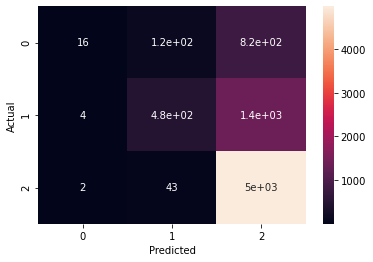

In [88]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.02      0.03       955
           1       0.74      0.26      0.38      1851
           2       0.69      0.99      0.82      5021

    accuracy                           0.70      7827
   macro avg       0.72      0.42      0.41      7827
weighted avg       0.71      0.70      0.62      7827



### XGBoost

In [90]:
from xgboost import XGBClassifier
start = time.time()

XGB_params = {
    'min_child_weight': [3, 5],
    'gamma': [1],
    'subsample': [1],
    'colsample_bytree': [0.6],
    'max_depth': [10]}

model_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid=XGB_params, n_jobs=8)

model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)

xgb_best = model_xgb.best_estimator_
y_pred = xgb_best.predict(X_test)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[10:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 1}
6.395초


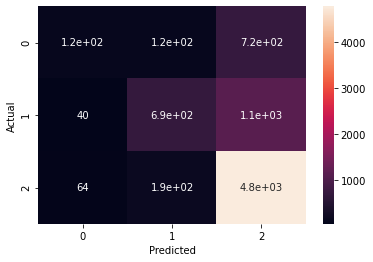

In [91]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.13      0.20       955
           1       0.69      0.37      0.49      1851
           2       0.72      0.95      0.82      5021

    accuracy                           0.71      7827
   macro avg       0.65      0.48      0.50      7827
weighted avg       0.69      0.71      0.67      7827

